# `contour_map`

A nod to Sanders' `contour_bin` routine  [arXiv:astro-ph/0606528](https://arxiv.org/abs/astro-ph/0606528) . Uses [`dmimglasso`](http://cxc.harvard.edu/ciao/ahelp/dmimglasso.html) to generate a contour around the max value down to next lowest value in the contour grid. Uses a maximum radius criteria to prevent thin, long “fingers”. Repeats until all pixels are included.

This routine works best with a smoothed input image.


In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Wed Jan 23 08:17:29 EST 2019


In [2]:
source display_map.sh

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

## Example 1

Create upto 100 contour levels from the min pixel value to the max
pixel value, spaced logarithmatically.  The contours are resticted to
stay within a 500 physical pixel radius circle of the starting point, and at most 150 contours will be created.

The `contour_map` behaves best when the input image is smoothed.  Here we use the input image which 
was smoothed with a 3pixels $\sigma$ Gaussina.


In [4]:
# To keep notebook short, I've removed some verbose output

contour_map infile=smimg.fits outfile=cbin.map binimg=cbin.img \
  distance=500 shape=circle nlevels=100 scale=log maxcontours=150 \
  verbose=1 clobber=yes  | egrep -v 'Contour lower limit'

contour_map
          infile = smimg.fits
         outfile = cbin.map
          binimg = cbin.img
        distance = 500
           shape = circle
          levels = 
         nlevels = 100
           scale = log
     maxcontours = 150
         verbose = 1
         clobber = yes
            mode = ql



### `map2reg`

`map2reg` is a little utility to convert maps into region files.  it can be incredibly slow.  Really all I'm
using if for here is to improve the visualization of the map regions.

In [5]:
### To keep notebook short, I've skipped this step after I created file once.
### map2reg cbin.map cbin.reg clob+
###
### dmcopy cbin.reg"[shape=Polygon]" cbin_a.reg clob+

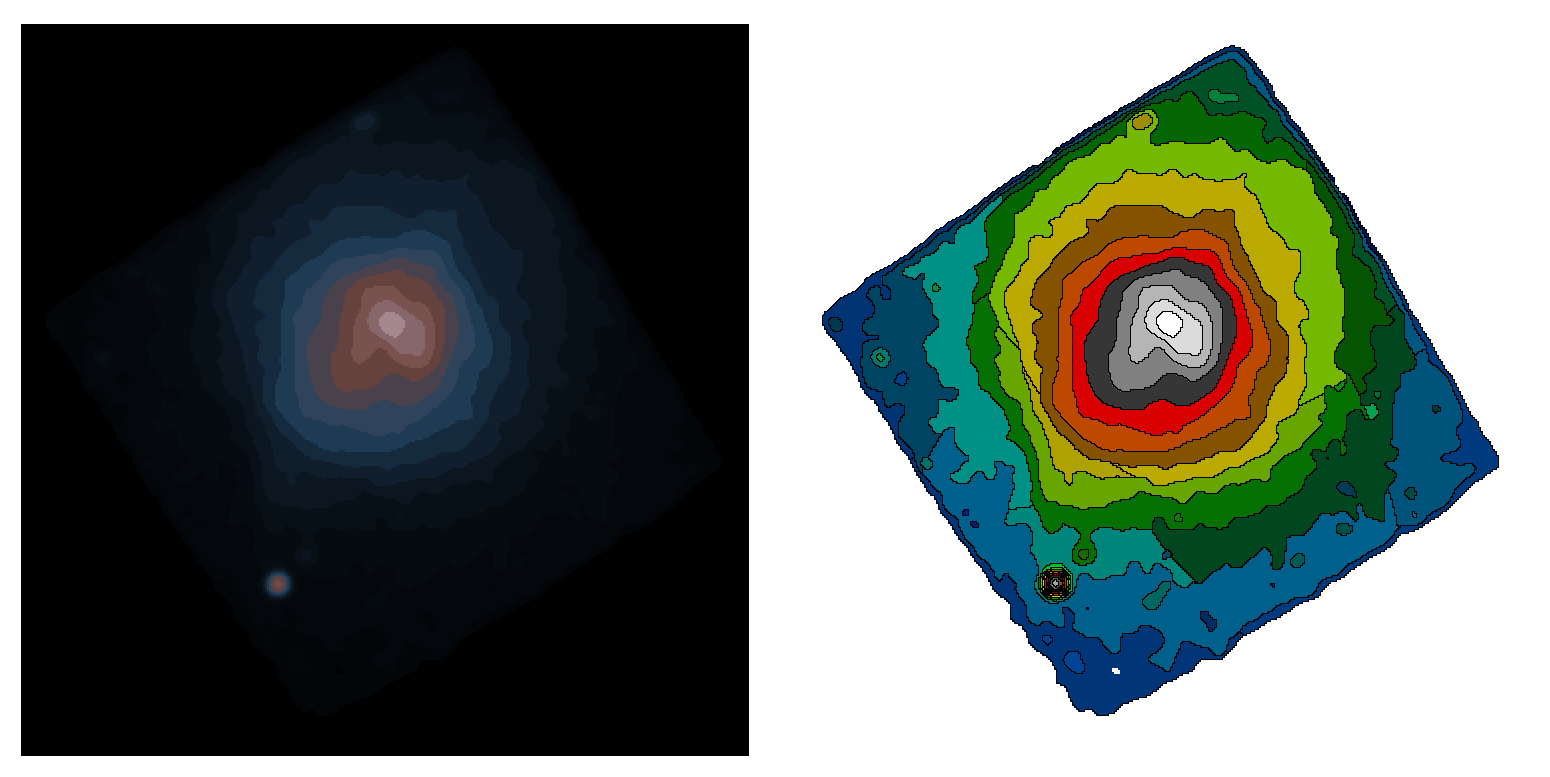

In [6]:
display_map cbin.img cbin.map cbin.png cbin_a.reg

Because we choose a maximum of 150 contours parts of the image are ungrouped.  There are many small groups around the bright point-like source.

This algorithm works better when the input is heavily smoothed, or when point-like source have been filled.

## Example 2


The algorithm to pick the contour levels is a bit finiky.  Users can also select the specific contour levels 
themselves.


In [7]:
contour_map infile=smimg.fits outfile=cbin2.map binimg=cbin2.img \
  distance=500 shape=circle levels="1,2,4,6,8,12,20,30,45,62" \
  maxcontours=150 \
  verbose=1 clobber=yes  | egrep -v 'Contour lower limit'

contour_map
          infile = smimg.fits
         outfile = cbin2.map
          binimg = cbin2.img
        distance = 500
           shape = circle
          levels = 1,2,4,6,8,12,20,30,45,62
         nlevels = 20
           scale = log
     maxcontours = 150
         verbose = 1
         clobber = yes
            mode = ql



In [8]:
### map2reg cbin2.map cbin2.reg clob+
###
### dmcopy cbin2.reg"[shape=Polygon]" cbin2_a.reg clob+

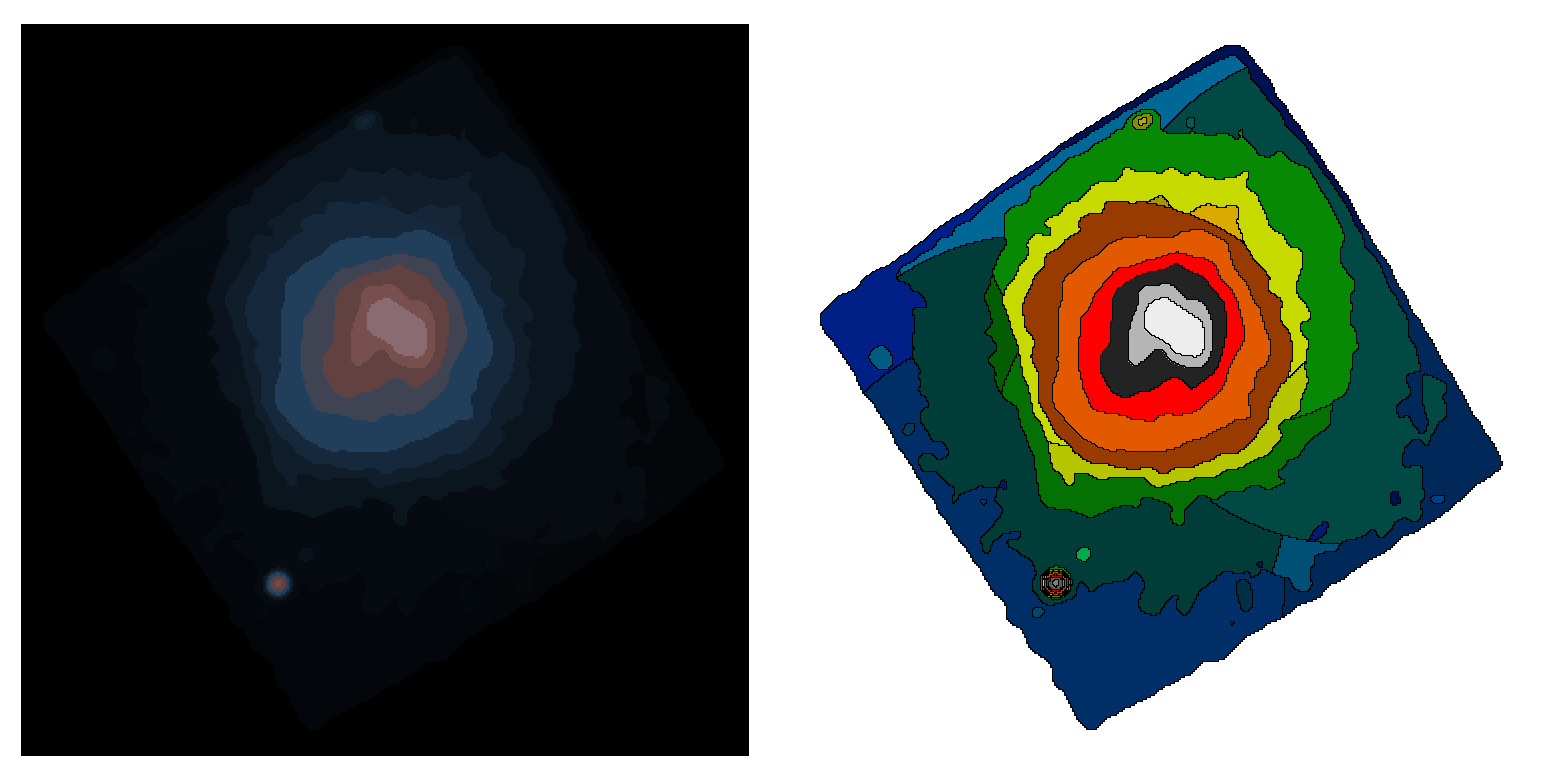

In [9]:
display_map cbin2.img cbin2.map cbin2.png cbin2_a.reg